<a href="https://colab.research.google.com/github/MeghanaSriram/2216167_AIML_Bootcamp_2023/blob/main/KNN_Malaria_Outbreak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/outbreak_detect.csv")

In [3]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


In [4]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of     maxTemp  minTemp  avgHumidity  Rainfall  Positive     pf  Outbreak
0     False    False        False     False     False  False     False
1     False    False        False     False     False  False     False
2     False    False        False     False     False  False     False
3      True    False        False     False     False  False     False
4     False    False        False     False     False  False     False
5     False    False        False     False     False  False     False
6     False    False        False     False     False  False     False
7     False    False        False     False     False  False     False
8     False    False        False     False     False  False     False
9     False    False        False     False     False  False     False
10    False    False        False     False     False  False     False
11    False    False        False     False     False  False     False
12    False    

<function matplotlib.pyplot.show(close=None, block=None)>

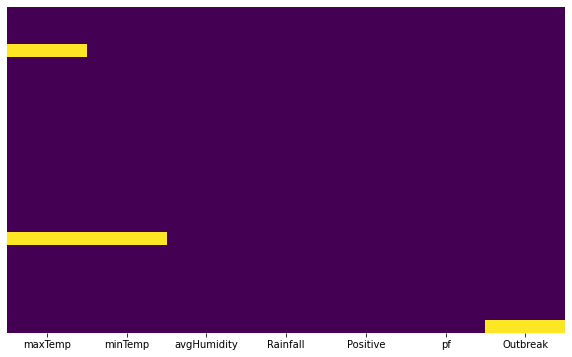

In [5]:
import seaborn as se
import matplotlib.pyplot as plt

def null_values(df):
  plt.figure(figsize=(10,6))
  se.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
  return plt.show

null_values(df)

In [6]:
md=df['maxTemp'].median()
md1=df['minTemp'].median()
print(md,md1)

33.5 24.0


In [7]:
df['maxTemp']=df['maxTemp'].fillna(md)
df['minTemp']=df['minTemp'].fillna(md1)
df

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,33.5,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes
6,31.0,24.0,88.77,41.40,10881,648,Yes
7,33.0,24.0,77.94,23.88,8830,459,Yes
8,31.0,24.0,84.57,11.15,9693,482,No
9,36.0,24.0,53.40,2.12,9310,549,No


In [8]:
from sklearn import preprocessing
#Label Encoding
LE=preprocessing.LabelEncoder()

df.Outbreak=LE.fit_transform(df.Outbreak)
df.tail()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
21,31.0,23.0,73.35,4.97,10659,612,1
22,30.0,23.0,86.81,7.21,9041,418,0
23,30.0,22.0,78.80,3.12,11265,404,1
24,33.0,22.0,73.71,1.75,9233,212,0
25,1.0,24.0,84.57,11.15,9693,482,2


In [9]:
mn=df['Outbreak'].median()
print(mn)

0.0


In [10]:
df['Outbreak'][25]=mn
print(df['Outbreak'][25])

0


<ipython-input-10-b74093a5f4af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outbreak'][25]=mn


In [11]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
3,33.5,24.0,84.57,11.15,9693,482,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1
6,31.0,24.0,88.77,41.40,10881,648,1
7,33.0,24.0,77.94,23.88,8830,459,1
8,31.0,24.0,84.57,11.15,9693,482,0
9,36.0,24.0,53.40,2.12,9310,549,0


In [14]:
df.tail()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
21,31.0,23.0,73.35,4.97,10659,612,1
22,30.0,23.0,86.81,7.21,9041,418,0
23,30.0,22.0,78.80,3.12,11265,404,1
24,33.0,22.0,73.71,1.75,9233,212,0
25,1.0,24.0,84.57,11.15,9693,482,0


<function matplotlib.pyplot.show(close=None, block=None)>

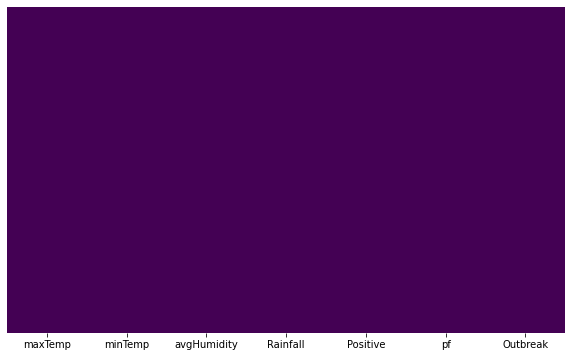

In [15]:
null_values(df)

In [16]:
df.shape

(26, 7)

In [17]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
3,33.5,24.0,84.57,11.15,9693,482,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1
6,31.0,24.0,88.77,41.40,10881,648,1
7,33.0,24.0,77.94,23.88,8830,459,1
8,31.0,24.0,84.57,11.15,9693,482,0
9,36.0,24.0,53.40,2.12,9310,549,0


In [18]:
df=df.drop(['Positive', 'pf'], axis=1)
df

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
3,33.5,24.0,84.57,11.15,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1
6,31.0,24.0,88.77,41.40,1
7,33.0,24.0,77.94,23.88,1
8,31.0,24.0,84.57,11.15,0
9,36.0,24.0,53.40,2.12,0


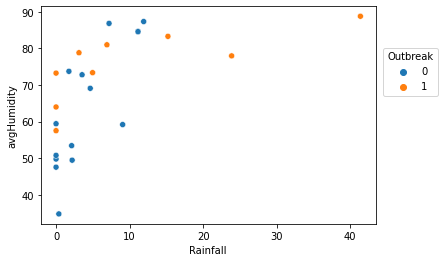

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='Rainfall', y='avgHumidity',hue='Outbreak', legend='brief',data=df)
plt.legend(loc='center right', title='Outbreak', bbox_to_anchor=(1.20,0.70))

In [22]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

In [23]:
X

array([[29.  , 18.  , 49.74,  0.  ],
       [34.  , 23.  , 83.27, 15.22],
       [40.  , 23.  , 50.74,  0.  ],
       [33.5 , 24.  , 84.57, 11.15],
       [34.  , 24.  , 59.16,  9.06],
       [34.  , 27.  , 73.23,  0.  ],
       [31.  , 24.  , 88.77, 41.4 ],
       [33.  , 24.  , 77.94, 23.88],
       [31.  , 24.  , 84.57, 11.15],
       [36.  , 24.  , 53.4 ,  2.12],
       [32.  , 23.  , 57.5 ,  0.  ],
       [34.  , 18.  , 59.4 ,  0.  ],
       [42.  , 24.  , 49.43,  2.19],
       [45.  , 32.  , 34.74,  0.38],
       [43.  , 28.  , 69.07,  4.65],
       [33.  , 23.  , 80.97,  6.92],
       [32.  , 24.  , 87.32, 11.92],
       [40.  , 27.  , 63.97,  0.  ],
       [33.5 , 24.  , 84.57, 11.15],
       [39.  , 25.  , 47.52,  0.  ],
       [36.  , 26.  , 72.78,  3.54],
       [31.  , 23.  , 73.35,  4.97],
       [30.  , 23.  , 86.81,  7.21],
       [30.  , 22.  , 78.8 ,  3.12],
       [33.  , 22.  , 73.71,  1.75],
       [ 1.  , 24.  , 84.57, 11.15]])

In [24]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
#normalizing the data - Standard Scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)   #Normalizing
X_test=sst.transform(X_test)

In [27]:
X_train

array([[-0.26364496, -0.29554023,  0.96394107, -0.15845234],
       [ 1.57573848,  3.50426275, -2.21792912, -0.86718156],
       [ 0.16554451,  0.1266601 ,  0.82706015,  0.25038999],
       [ 0.83998511,  0.54886043, -1.43697462, -0.90661305],
       [-0.01839383,  0.1266601 ,  0.99510592,  0.33029064],
       [ 0.22685729, -0.29554023,  0.74762033,  0.67272204],
       [-0.01839383, -0.29554023, -0.82712126, -0.90661305],
       [-3.81978629,  0.1266601 ,  0.82706015,  0.25038999],
       [ 0.10423173, -0.71774056,  0.16343215, -0.72502065],
       [-0.1410194 ,  0.1266601 ,  0.82706015,  0.25038999],
       [-0.1410194 ,  0.1266601 ,  1.08371187,  3.38934442],
       [ 0.22685729,  0.1266601 , -0.72568272,  0.03351677],
       [ 0.47210842,  0.1266601 , -1.07766222, -0.68662683],
       [ 0.10423173,  0.1266601 ,  0.42191709,  1.57134503],
       [-0.26364496, -0.71774056,  0.47446958, -0.58285974],
       [ 0.16554451,  0.1266601 ,  0.82706015,  0.25038999],
       [-0.38627052, -2.

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [32]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
y_pred=model.predict(X_test)

In [35]:
print(model.score(sst.transform(X),Y))

0.7692307692307693


In [37]:
print(model.score(X_test,Y_test))

0.6666666666666666


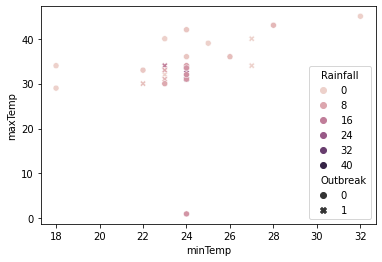

In [38]:
sns.scatterplot(data=df, x="minTemp", y="maxTemp", hue="Rainfall" , style="Outbreak")
plt.show()